In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values 
y = dataset.iloc[:,-1].values
print(x)
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole Dataset

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y.ravel())

SVR()

Predicting new Results

In [8]:
sc_y.inverse_transform([regressor.predict(sc_x.transform([[6.5]]))])

array([[170370.0204065]])

Visualising the SVR Results

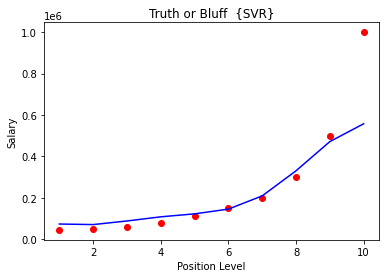

In [9]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform([regressor.predict(x)]).reshape(10,1), color='blue')
plt.title('Truth or Bluff  {SVR}')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR results (for higher resolution and smoother curve)

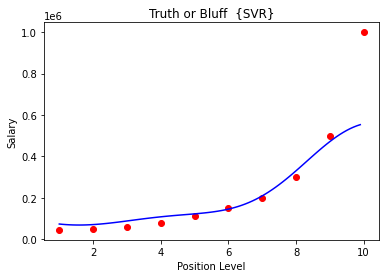

In [10]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')
plt.plot(x_grid, sc_y.inverse_transform([regressor.predict(sc_x.transform(x_grid))]).reshape(90,1), color='blue')
plt.title('Truth or Bluff  {SVR}')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()